In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import display, Math, Latex

# Análisis de las comunidades autónomas

In [2]:
path="Dataset\\datos_Comunidad_autonoma.csv"

In [3]:
data=pd.read_csv(path)

In [4]:
data.head()

,ccaa_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida
0,AN,2020-01-31,0,0,0,0,0
1,AR,2020-01-31,0,0,0,0,0
2,AS,2020-01-31,0,0,0,0,0
3,CB,2020-01-31,0,0,0,0,0
4,CE,2020-01-31,0,0,0,0,0


In [5]:
#Tamaño del DataFrame
data.shape

(3515, 7)

In [6]:
#Obtención de las columnas
data.columns.values

array(['ccaa_iso', 'fecha', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_otras',
       'num_casos_prueba_desconocida'], dtype=object)

In [7]:
#Tipos de datos
data.dtypes

ccaa_iso                        object
fecha                           object
num_casos                        int64
num_casos_prueba_pcr             int64
num_casos_prueba_test_ac         int64
num_casos_prueba_otras           int64
num_casos_prueba_desconocida     int64
dtype: object

In [8]:
#Resumen de características de las columnas
data.describe()

,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,92.850356,81.038122,5.943670,0.502134,5.366430
std,248.449708,237.473596,22.012187,3.817654,36.423082
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000
50%,11.000000,9.000000,0.000000,0.000000,0.000000
75%,71.000000,53.000000,0.000000,0.000000,0.000000
max,3112.000000,3107.000000,286.000000,72.000000,612.000000


In [9]:
#Número de casos totales registrados por PCR,Test_ac, otras_pruebas, prueba_desconocida
data["num_casos"].sum()

326369

In [10]:
#Comprobar que estan todas las comunidades autómas
data["ccaa_iso"].unique()

array(['AN', 'AR', 'AS', 'CB', 'CE', 'CL', 'CM', 'CN', 'CT', 'EX', 'GA',
       'IB', 'MC', 'MD', 'ML', 'NC', 'PV', 'RI', 'VC'], dtype=object)

In [11]:
#Número de comunidades autónomas
len(data["ccaa_iso"].unique().tolist())

19

In [12]:
#Creación de diccionario que relacione los nombres de las ccaa con su iso, población, densidad(Kg/m2)
#https://www.ine.es/dynt3/inebase/index.htm?padre=2077&capsel=2077 (2020)
CA_Dict1={
    'AN':["ANDALUCIA",8414240,96.63,42.13,42.88,17.41,104.17],
    'AR':["ARAGÓN",1319291,27.86,44.93,45.70,21.73,145.47],
    'AS':["PRINCIPADO DE ASTURIAS",1022800,96.08,48.54,49.96,26.09,224.57],
    'CB':["CANTABRIA",581078,109.55,45.85,46.91,22.29,159.29],
    'CE':["CIUDAD AUTÓNOMA DE CEUTA",84777,4210.10,37.94,37.71,12.42,58.38],
    'CL':["CASTILLA Y LEÓN",2399548,25.42,47.73,49.16,25.51,201.03],
    'CM':["CASTILLA-LA MANCHA",2032863,25.74,43.28,43.82,19.08,119.17],
    'CN':["CANARIAS",2153389,292.19,42.83,43.65,16.54,119.17],
    'CT':["CATALUÑA",7675217,242.28,42.95,43.53,19.22,117.54],
    'EX':["EXTREMADURA",1067710,25.56,44.63,45.62,20.89,144.29],
    'GA':["GALICIA",2699499,91.35,47.48,48.27,25.44,202.17],
    'IB':["ILLES BALEARS",1149460,234.68,42.68,41.96,15.97,102.19],
    'MC':["REGIÓN DE MURCIA",1493898,133.57,40.75,41.33,15.89,87.86],
    'MD':["COMUNIDAD DE MADRID",6663394,844.53,42.52,43.09,17.98,110.83],
    'ML':["CIUDAD AUTÓNOMA DE MELILLA",86487,7256.33,35.72,34.37,11.09,44.56],
    'NC':["COMUNIDAD FORAL DE NAVARRA",654214,63.63,43.42,44.30,19.96,121.58],
    'PV':["PAÍS VASCO",2207776,306.95,45.62,46.96,22.84,154.01],
    'RI':["LA RIOJA",316798,63.41,44.64,45.96,21.27,138.29],
    'VC':["COMUNITAT VALENCIANA",5003769,217.47,43.57,44.44,19.67,125.22]
}

In [13]:
#Transformar el Diccionario a DataFrame
DataFrameDic=pd.DataFrame.from_dict(CA_Dict1,orient='index',columns=['Nombre', 'Habitantes', 'Densidad Población', 'Edad Media','Edad Mediana',
                                                                    'Porcentaje 65 y más años','Índice de envejecimiento'])

In [14]:
DataFrameDic

,Nombre,Habitantes,Densidad Población,Edad Media,Edad Mediana,Porcentaje 65 y más años,Índice de envejecimiento
AN,ANDALUCIA,8414240,96.63,42.13,42.88,17.41,104.17
AR,ARAGÓN,1319291,27.86,44.93,45.70,21.73,145.47
AS,PRINCIPADO DE ASTURIAS,1022800,96.08,48.54,49.96,26.09,224.57
CB,CANTABRIA,581078,109.55,45.85,46.91,22.29,159.29
CE,CIUDAD AUTÓNOMA DE CEUTA,84777,4210.10,37.94,37.71,12.42,58.38
CL,CASTILLA Y LEÓN,2399548,25.42,47.73,49.16,25.51,201.03
CM,CASTILLA-LA MANCHA,2032863,25.74,43.28,43.82,19.08,119.17
CN,CANARIAS,2153389,292.19,42.83,43.65,16.54,119.17
CT,CATALUÑA,7675217,242.28,42.95,43.53,19.22,117.54
EX,EXTREMADURA,1067710,25.56,44.63,45.62,20.89,144.29


In [15]:
DataFrameDic.sort_values('Porcentaje 65 y más años',ascending=False)

,Nombre,Habitantes,Densidad Población,Edad Media,Edad Mediana,Porcentaje 65 y más años,Índice de envejecimiento
AS,PRINCIPADO DE ASTURIAS,1022800,96.08,48.54,49.96,26.09,224.57
CL,CASTILLA Y LEÓN,2399548,25.42,47.73,49.16,25.51,201.03
GA,GALICIA,2699499,91.35,47.48,48.27,25.44,202.17
PV,PAÍS VASCO,2207776,306.95,45.62,46.96,22.84,154.01
CB,CANTABRIA,581078,109.55,45.85,46.91,22.29,159.29
AR,ARAGÓN,1319291,27.86,44.93,45.70,21.73,145.47
RI,LA RIOJA,316798,63.41,44.64,45.96,21.27,138.29
EX,EXTREMADURA,1067710,25.56,44.63,45.62,20.89,144.29
NC,COMUNIDAD FORAL DE NAVARRA,654214,63.63,43.42,44.30,19.96,121.58
VC,COMUNITAT VALENCIANA,5003769,217.47,43.57,44.44,19.67,125.22


In [16]:
DataFrameDic.shape

(19, 7)

In [17]:
#Tratando con los datos diarios de contagio de la pandemia
#Primero transformar la fecha a formato datetime
data["fecha"]=pd.to_datetime(data["fecha"])

In [18]:
data.dtypes

ccaa_iso                                object
fecha                           datetime64[ns]
num_casos                                int64
num_casos_prueba_pcr                     int64
num_casos_prueba_test_ac                 int64
num_casos_prueba_otras                   int64
num_casos_prueba_desconocida             int64
dtype: object

## Obtención de la incidencia acumulada por cada 100.000 habitantes en cada comunidad autónoma

In [19]:
# Búsqueda de la tasa de incidencia adecuado para la comparación de los datos
# 1º Es necesario identificar de entre las comunidades autónomas aquella que disponga de menos habitantes 
DataFrameDic['Habitantes'].min()

84777

In [20]:
# 2º se procede a calcular la tasa de incidencia por cada 100.000 habitantes, con una media móvil de 7 días
display(Math(r"I={\frac{C_7}{C_7+Población}} \cdot 100000"))

<IPython.core.display.Math object>

In [21]:
#Función que calcula las incidencias acumuladas con periodo 7 días
def Incidencia_acumulada(factor=100000):
    comunidades_T=["CM","CL","AR",'AN','AS','CB','CE','CN',
                'CT','EX', 'GA','IB','MD','ML','NC','PV','RI','VC','MC']
    m=0
    for c  in comunidades_T:
        
        C_data=data[data["ccaa_iso"]==c]
        poblacion=DataFrameDic.loc[c]['Habitantes']
        n=C_data.shape[0]
        #Valor inicial
        L_IA=[]
        dias=pd.Series(range(7,185))
        i=0
        j=7
        
        while j<(n):
            Casos=round(((C_data["num_casos"][i:j].sum())/poblacion)*factor,2)
            L_IA.append(Casos)
            i=i+1
            j=j+1
        
        if m==0:
            DF_IA=pd.DataFrame({c:L_IA,
                            })
            m=m+1
        else:
            #Concatena dicho dataFrame con el de datos_nuevos
            df=pd.DataFrame({c:L_IA,
                        })
            frames=[DF_IA,df]
            DF_IA=pd.concat(frames,axis=1)
            
    return DF_IA

In [22]:
#Incidencia acumulada por cada 100.000 habitantes en las CCAA
DF_IncidenciaAcum=Incidencia_acumulada()
DF_IncidenciaAcum.head(10)

,CM,CL,AR,AN,AS,CB,CE,CN,CT,EX,GA,IB,MD,ML,NC,PV,RI,VC,MC
0,0.0,0.13,0.08,0.11,0.0,0.0,1.18,0.09,0.25,0.19,0.15,0.00,0.56,0.0,0.15,0.00,0.32,0.34,0.13
1,0.0,0.17,0.08,0.13,0.0,0.0,1.18,0.09,0.27,0.19,0.15,0.00,0.63,0.0,0.15,0.00,0.32,0.28,0.13
2,0.0,0.17,0.08,0.11,0.0,0.0,1.18,0.09,0.17,0.28,0.15,0.00,0.62,0.0,0.15,0.00,0.32,0.24,0.13
3,0.0,0.17,0.08,0.10,0.0,0.0,1.18,0.05,0.16,0.09,0.11,0.00,0.56,0.0,0.15,0.05,0.32,0.24,0.13
4,0.0,0.17,0.08,0.10,0.0,0.0,1.18,0.05,0.17,0.09,0.07,0.17,0.60,0.0,0.31,0.05,0.00,0.22,0.20
5,0.0,0.17,0.15,0.10,0.0,0.0,1.18,0.00,0.14,0.09,0.04,0.17,0.68,0.0,0.15,0.05,0.00,0.22,0.20
6,0.0,0.21,0.15,0.10,0.0,0.0,0.00,0.05,0.20,0.09,0.00,0.17,0.75,0.0,0.15,0.14,0.00,0.18,0.07
7,0.0,0.33,0.15,0.10,0.0,0.0,1.18,0.05,0.30,0.19,0.00,0.17,0.92,0.0,0.15,0.14,0.00,0.18,0.07
8,0.0,0.33,0.15,0.08,0.0,0.0,1.18,0.09,0.29,0.28,0.00,0.26,0.95,0.0,0.15,0.14,0.00,0.20,0.13
9,0.0,0.33,0.15,0.13,0.0,0.0,1.18,0.09,0.40,0.37,0.00,0.26,1.02,0.0,0.15,0.27,0.00,0.28,0.13


In [23]:
DF_IncidenciaAcum.shape

(178, 19)

In [24]:
round(DF_IncidenciaAcum.describe(),2)

,CM,CL,AR,AN,AS,CB,CE,CN,CT,EX,GA,IB,MD,ML,NC,PV,RI,VC,MC
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,43.87,44.85,48.40,8.85,9.67,16.83,10.43,4.95,38.65,22.08,16.37,9.40,45.56,6.80,55.13,30.04,51.20,13.35,8.59
std,70.39,64.49,74.01,12.41,16.17,28.84,14.61,8.15,41.56,27.06,24.24,13.44,71.11,11.89,73.66,42.29,89.77,18.56,13.11
min,0.00,0.13,0.08,0.08,0.00,0.00,0.00,0.00,0.14,0.09,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.18,0.07
25%,5.27,4.50,5.10,0.78,0.29,1.59,0.00,0.88,8.53,2.36,0.71,2.11,6.54,0.00,5.20,2.74,1.58,1.39,0.76
50%,9.69,8.62,18.30,2.65,1.47,2.75,4.13,1.35,16.27,6.79,3.80,3.22,10.71,1.16,12.23,8.94,7.26,3.46,2.51
75%,42.02,68.87,57.50,10.77,7.55,19.40,14.15,4.42,73.25,41.52,24.02,8.57,46.74,4.62,78.11,37.71,48.85,18.83,10.38
max,266.67,234.09,333.36,48.67,61.69,129.93,61.34,33.67,147.04,105.93,86.50,52.98,288.34,43.94,278.20,164.65,325.13,76.40,53.69


## Visualización de los datos
#### Evolución diaria de los casos en la primera ola

In [25]:
 #Se le asigna a cada comunidad autónoma su color, para mejorar la visualización
Dic_color={
    'CM':'darkred',
    'CL':'gray',
    'AR':'purple',
    'AN':'green',
    'AS':'pink',
    'CB':'red',
    'CE':'black',
    'CN':'tan',
    'CT':'yellow',
    'EX':'violet',
    'GA':'greenyellow',
    'IB':'brown',
    'MD':'blue',
    'ML':'dimgray',
    'NC':'purple',
    'PV':'greenyellow',
    'RI':'midnightblue',
    'VC':'black',
    'MC':'Orange'
    }

In [26]:
def rep_casosdiarios(comunidades=["CM","CL","AR",'AN']):
    
    y=data[data["ccaa_iso"]==comunidades[0]]['num_casos'][7:185] 
    y1=data[data["ccaa_iso"]==comunidades[1]]['num_casos'][7:185] 
    y2=data[data["ccaa_iso"]==comunidades[2]]['num_casos'][7:185] 
    y3=data[data["ccaa_iso"]==comunidades[3]]['num_casos'][7:185] 
    
    x=np.arange(7,185).tolist()
    fig, axs=plt.subplots(2,2,constrained_layout=False,figsize=(16,9))  
    axs[0][0].bar(x,y,color=Dic_color[comunidades[0]])
    axs[0][0].set_title(str(CA_Dict1[comunidades[0]][0]) +"({})".format(int(y.mean())))
    axs[0][0].set_ylabel('nº Casos', fontsize=12)
    
    axs[0][1].bar(x,y1,color=Dic_color[comunidades[1]])
    axs[0][1].set_title(str(CA_Dict1[comunidades[1]][0]) +"({})".format(int(y1.mean())))
    
    
    axs[1][0].bar(x,y2,color=Dic_color[comunidades[2]])
    axs[1][0].set_title(str(CA_Dict1[comunidades[2]][0]) +"({})".format(int(y2.mean())))
    axs[1][0].set_ylabel('nº Casos', fontsize=12)
    axs[1][0].set_xlabel('nº Días', fontsize=12)
    
    axs[1][1].bar(x,y3,color=Dic_color[comunidades[3]])
    axs[1][1].set_title(str(CA_Dict1[comunidades[3]][0]) +"({})".format(int(y3.mean())))
    axs[1][1].set_xlabel('nº Días', fontsize=12)

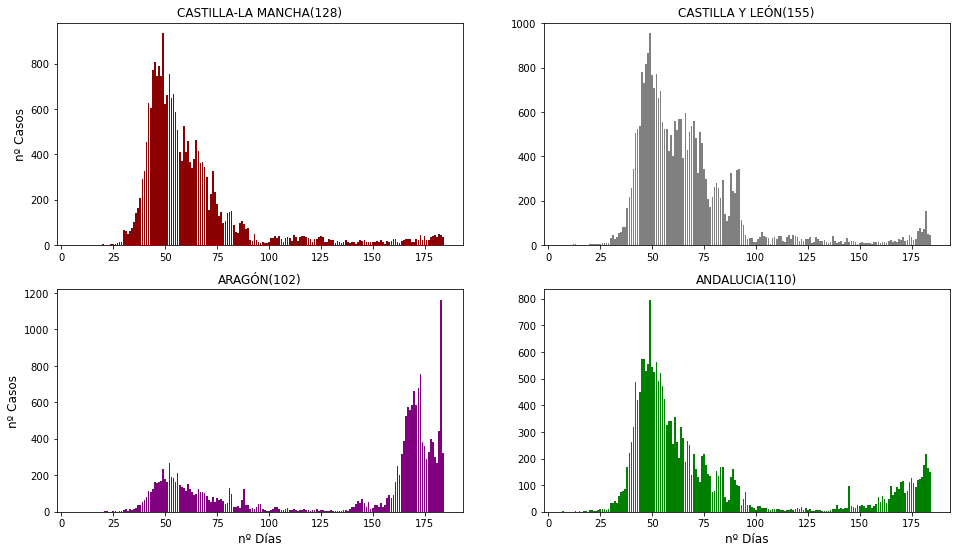

In [27]:
rep_casosdiarios()

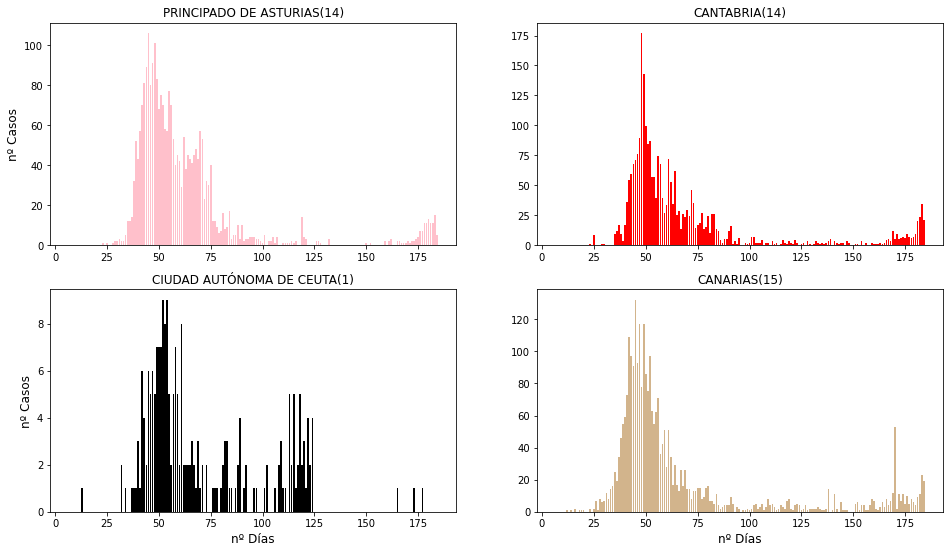

In [28]:
#["CM","CL","AR",'AN','AS','CB','CE','CN','CT','EX', 'GA','IB','MD','ML','NC','PV','RI','VC']
rep_casosdiarios(['AS','CB','CE','CN'])

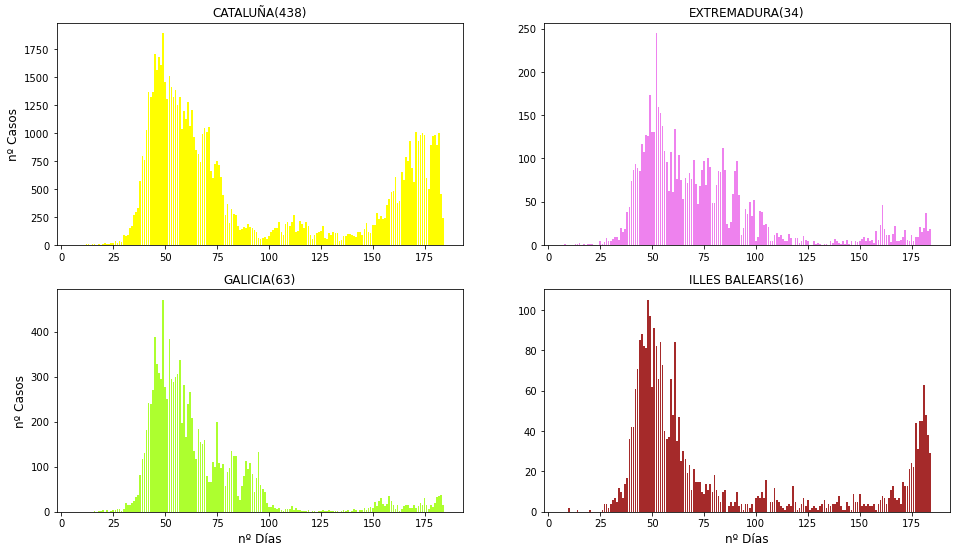

In [29]:
rep_casosdiarios(['CT','EX', 'GA','IB'])

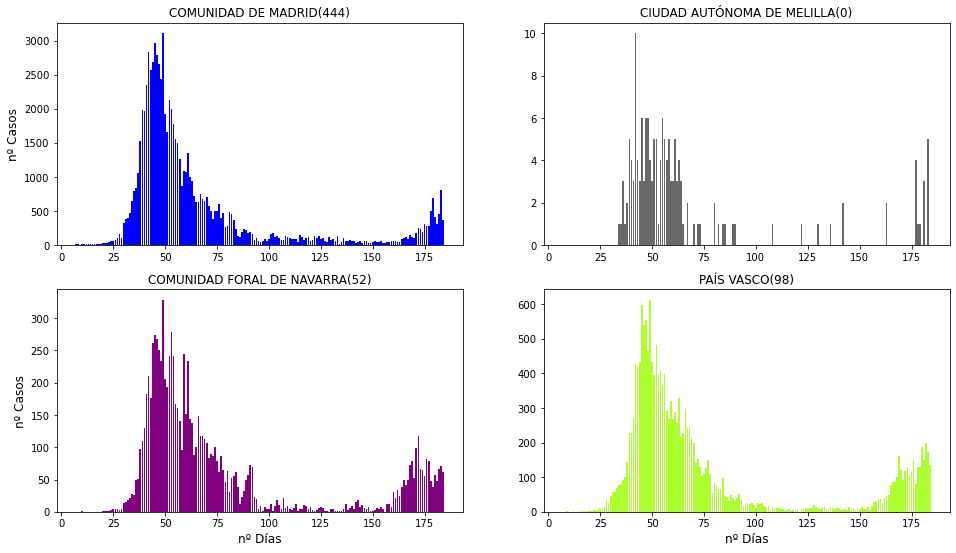

In [30]:
rep_casosdiarios(['MD','ML','NC','PV'])

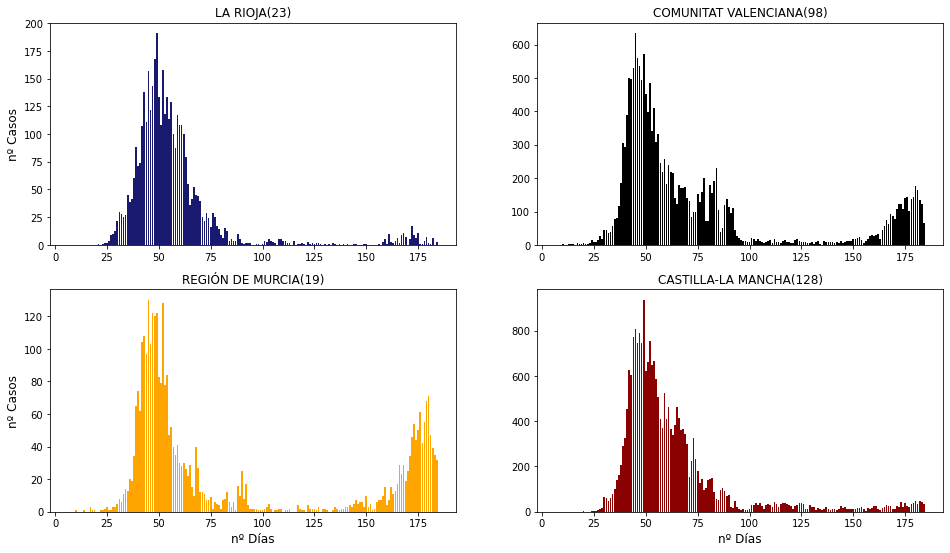

In [31]:
rep_casosdiarios(['RI','VC','MC','CM'])

* Se observa una distribución homogenea, es decir, todas las gráficas tiene la misma forma de ola. El intervalo de días es parecido

### Corregir el número de día a 125

* Se pretende realizar el estudio sobre la primera ola. viendo como evolucionan los datos en cada una de las comunidades autónomas, se puede estimar que la primera ola de la pandemia duró 125 días. Por lo tanto el resto de datos no son de interés para este análisis.

In [32]:
def rep_casosdiarios_corregidos(comunidades=["CM","CL","AR",'AN']):
    
    y=data[data["ccaa_iso"]==comunidades[0]]['num_casos'][7:125] 
    y1=data[data["ccaa_iso"]==comunidades[1]]['num_casos'][7:125] 
    y2=data[data["ccaa_iso"]==comunidades[2]]['num_casos'][7:125] 
    y3=data[data["ccaa_iso"]==comunidades[3]]['num_casos'][7:125] 
    
    x=np.arange(7,125).tolist()
    fig, axs=plt.subplots(2,2,constrained_layout=False,figsize=(16,9))  
    axs[0][0].bar(x,y,color=Dic_color[comunidades[0]])
    axs[0][0].set_title(str(CA_Dict1[comunidades[0]][0]) +"({})".format(int(y.mean())))
    axs[0][0].set_ylabel('nº Casos', fontsize=12)
    
    axs[0][1].bar(x,y1,color=Dic_color[comunidades[1]])
    axs[0][1].set_title(str(CA_Dict1[comunidades[1]][0]) +"({})".format(int(y1.mean())))
    
    
    axs[1][0].bar(x,y2,color=Dic_color[comunidades[2]])
    axs[1][0].set_title(str(CA_Dict1[comunidades[2]][0]) +"({})".format(int(y2.mean())))
    axs[1][0].set_ylabel('nº Casos', fontsize=12)
    axs[1][0].set_xlabel('nº Días', fontsize=12)
    
    axs[1][1].bar(x,y3,color=Dic_color[comunidades[3]])
    axs[1][1].set_title(str(CA_Dict1[comunidades[3]][0]) +"({})".format(int(y3.mean())))
    axs[1][1].set_xlabel('nº Días', fontsize=12)

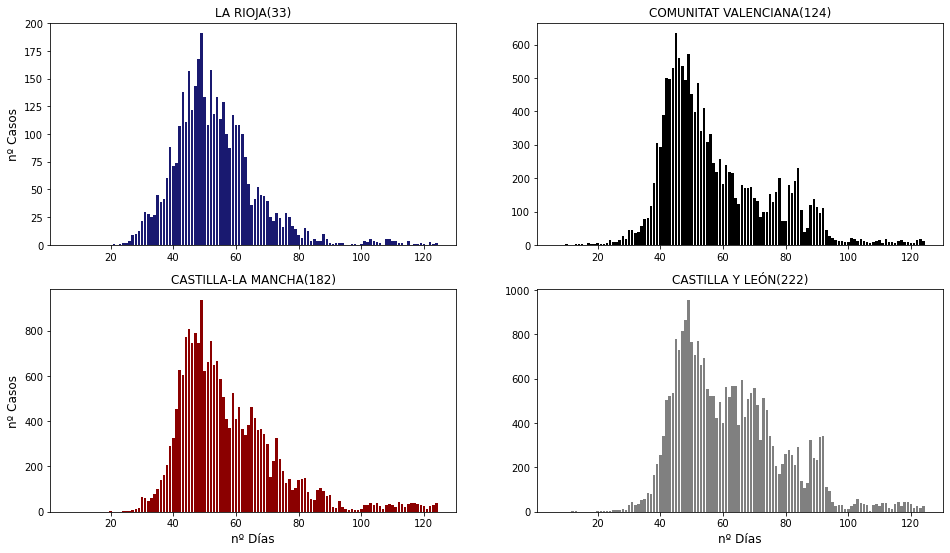

In [33]:
#["CM","CL","AR",'AN','AS','CB','CE','CN','CT','EX', 'GA','IB','MD','ML','NC','PV','RI','VC','MC']
rep_casosdiarios_corregidos(['RI','VC',"CM","CL"])

* El siguiente paso, es análizar cuál de las comunidades autónomas ha sido más castigado en esta primera ola

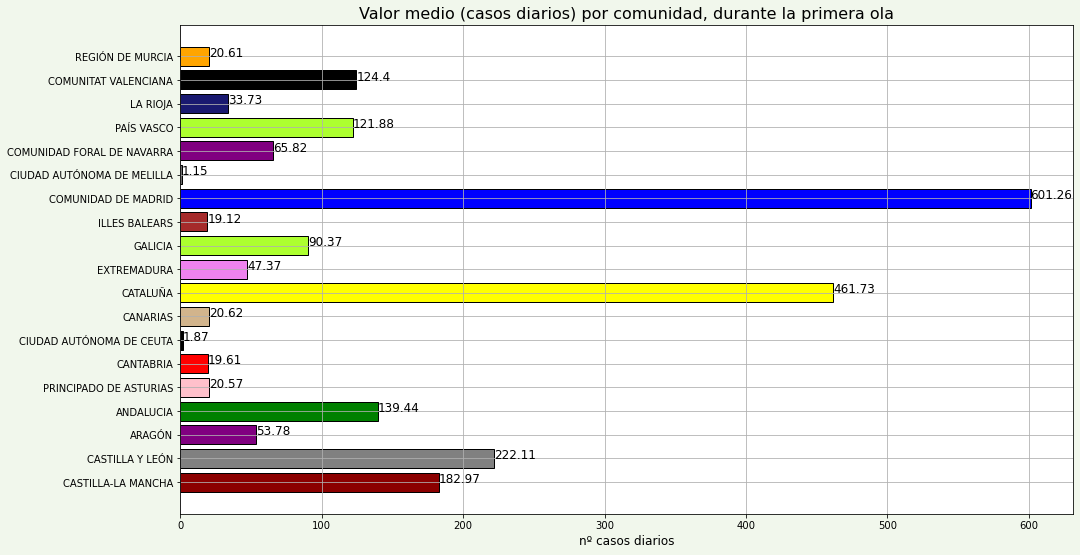

In [34]:
#Se procede a analizar el valor medio de contagios diarios por comunidad
Lis_m_d=[]
fig, ax = plt.subplots(figsize=(16,9))
fig.set_facecolor("#f1f7ec")
for i in ["CM","CL","AR",'AN','AS','CB','CE','CN','CT','EX', 'GA','IB','MD','ML','NC','PV','RI','VC','MC']:
    y=data[data["ccaa_iso"]==i]['num_casos'][7:125]
    y=y.mean()
    ax.barh(CA_Dict1[i][0],y,color=Dic_color[i],edgecolor ='black',align='center')
    ax.set_title('Valor medio (casos diarios) por comunidad, durante la primera ola',fontsize=16)
    ax.text(y, CA_Dict1[i][0], str(round(y,2)),fontsize=12)
    ax.set_xlabel('nº casos diarios', fontsize=12)
    ax.grid(True)
plt.show()

In [35]:
DF_IncidenciaAcum.shape

(178, 19)

### Evolución de los datos en base a la incidencia acumulada (periodo de 7 días)

In [36]:
def rep_IncidenciaAcumulada(comunidades=["CM","CL","AR",'AN']):
    
    y=DF_IncidenciaAcum[comunidades[0]][0:125] 
    y1=DF_IncidenciaAcum[comunidades[1]][0:125]
    y2=DF_IncidenciaAcum[comunidades[2]][0:125]
    y3=DF_IncidenciaAcum[comunidades[3]][0:125] 
    
    x=np.arange(0,125).tolist()
    fig, axs=plt.subplots(2,2,constrained_layout=False,figsize=(16,9))  
    axs[0][0].bar(x,y,color=Dic_color[comunidades[0]])
    axs[0][0].set_title(str(CA_Dict1[comunidades[0]][0]) +"({})".format(int(y.mean())))
    axs[0][0].set_ylabel('Incidencia acumulada', fontsize=12)
    
    axs[0][1].bar(x,y1,color=Dic_color[comunidades[1]])
    axs[0][1].set_title(str(CA_Dict1[comunidades[1]][0]) +"({})".format(int(y1.mean())))
    
    
    axs[1][0].bar(x,y2,color=Dic_color[comunidades[2]])
    axs[1][0].set_title(str(CA_Dict1[comunidades[2]][0]) +"({})".format(int(y2.mean())))
    axs[1][0].set_ylabel('Incidencia acumulada', fontsize=12)
    axs[1][0].set_xlabel('nº Días', fontsize=12)
    
    axs[1][1].bar(x,y3,color=Dic_color[comunidades[3]])
    axs[1][1].set_title(str(CA_Dict1[comunidades[3]][0]) +"({})".format(int(y3.mean())))
    axs[1][1].set_xlabel('nº Días', fontsize=12)

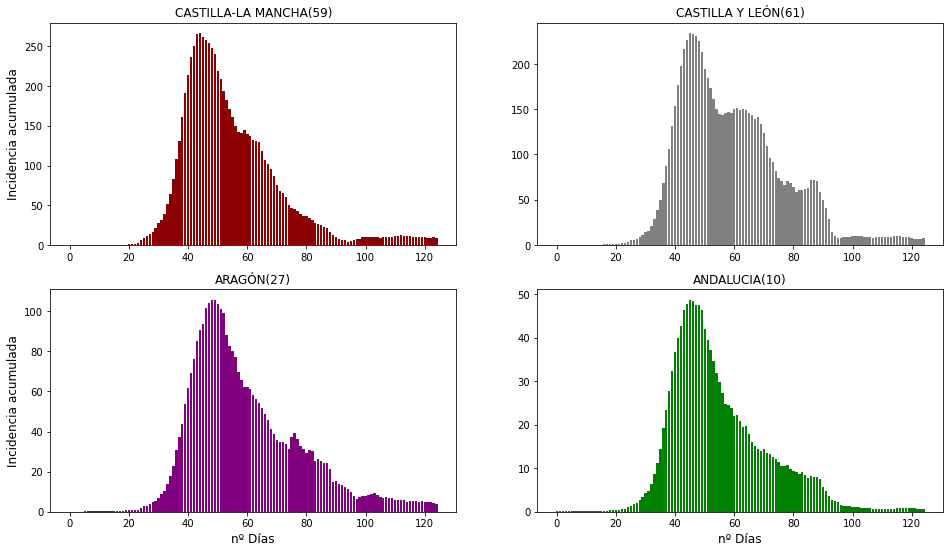

In [37]:
rep_IncidenciaAcumulada()

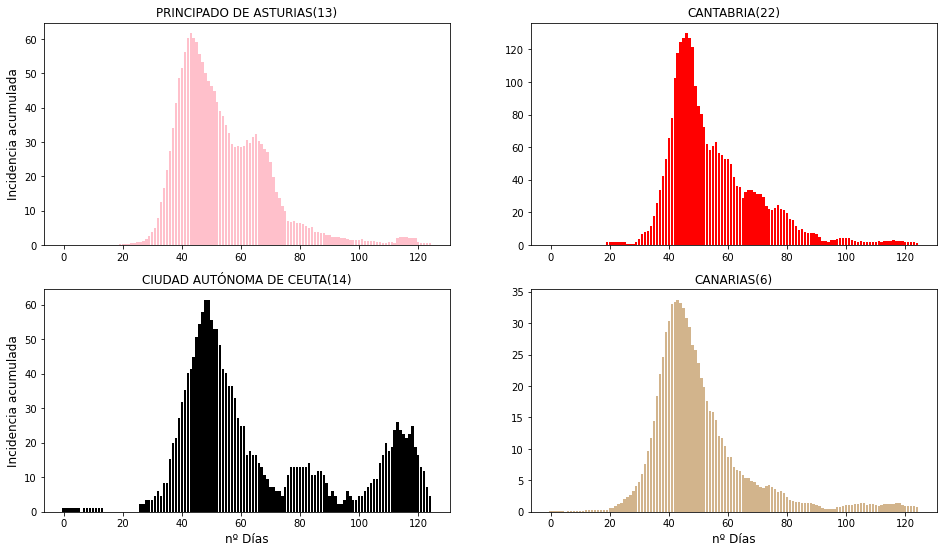

In [38]:
#["CM","CL","AR",'AN','AS','CB','CE','CN','CT','EX', 'GA','IB','MD','ML','NC','PV','RI','VC']
rep_IncidenciaAcumulada(['AS','CB','CE','CN'])

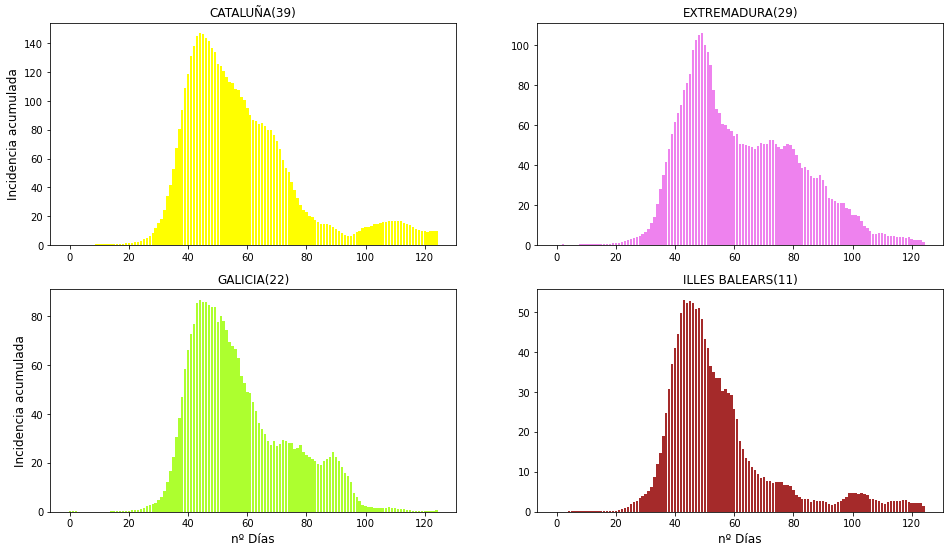

In [39]:
rep_IncidenciaAcumulada(['CT','EX', 'GA','IB'])

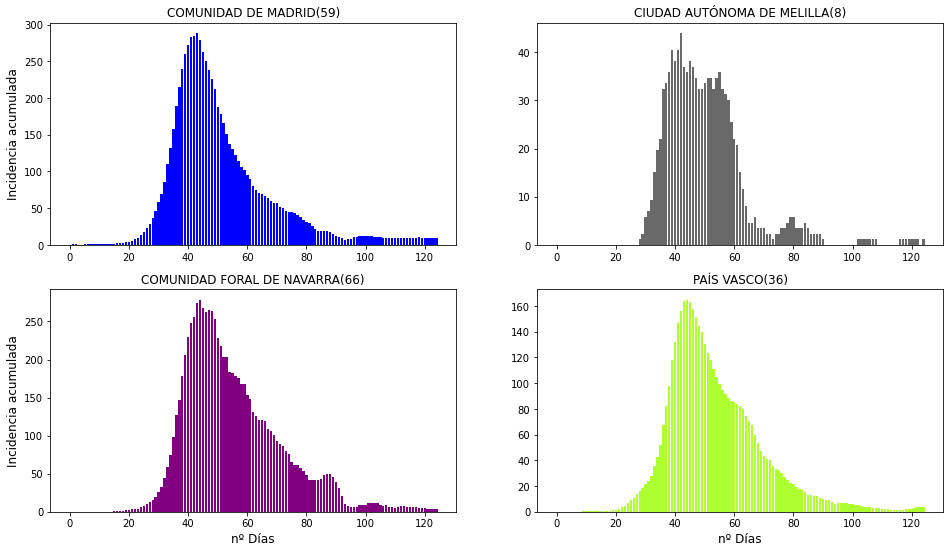

In [40]:
rep_IncidenciaAcumulada(['MD','ML','NC','PV'])

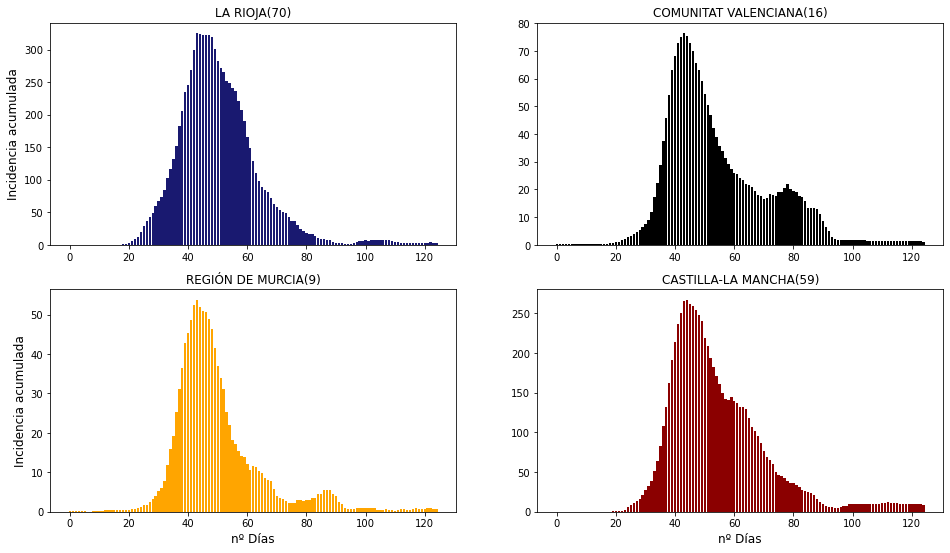

In [41]:
rep_IncidenciaAcumulada(['RI','VC','MC','CM'])

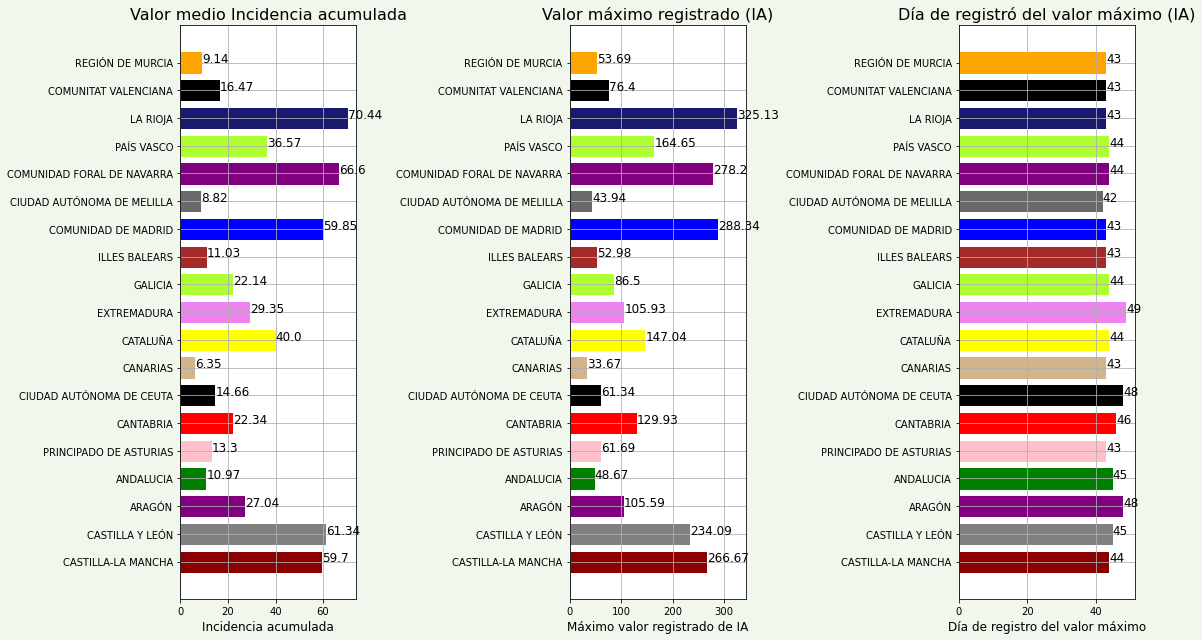

In [42]:
#Se procede a analizar el valor medio de incidencia acumulada, valor máximo
#Se procede a analizar el valor medio de incidencia acumulada, valor máximo de incidencia acumulada, Día en el
#que se alcanza dicho valor máximo 
fig, axs = plt.subplots(nrows=1, ncols=3,squeeze=False,constrained_layout=False,figsize=(16,9))
fig.set_facecolor("#f1f7ec")
for i in ['CM','CL','AR','AN','AS','CB','CE','CN','CT','EX', 'GA','IB','MD','ML','NC','PV','RI','VC','MC']:
    y=DF_IncidenciaAcum[i][0:125] 
    y_med=y.mean()
    y_max=y.max()
    y_dia_max=DF_IncidenciaAcum[i][0:125].argmax()
    axs[0][0].barh(CA_Dict1[i][0],y_med,color=Dic_color[i],edgecolor ='white',align='center')
    axs[0][0].set_title('Valor medio Incidencia acumulada',fontsize=16)
    axs[0][0].text(y_med, CA_Dict1[i][0], str(round(y_med,2)),fontsize=12)
    axs[0][0].set_xlabel('Incidencia acumulada', fontsize=12)
    axs[0][0].grid(True)
    
    axs[0][1].barh(CA_Dict1[i][0],y_max,color=Dic_color[i],edgecolor ='white',align='center')
    axs[0][1].set_title('Valor máximo registrado (IA)',fontsize=16)
    axs[0][1].text(y_max, CA_Dict1[i][0], str(round(y_max,2)),fontsize=12)
    axs[0][1].set_xlabel('Máximo valor registrado de IA', fontsize=12)
    axs[0][1].grid(True)
    
    axs[0][2].barh(CA_Dict1[i][0],y_dia_max,color=Dic_color[i],edgecolor ='white',align='center')
    axs[0][2].set_title('Día de registró del valor máximo (IA)',fontsize=16)
    axs[0][2].text(y_dia_max, CA_Dict1[i][0], str(round(y_dia_max,2)),fontsize=12)
    axs[0][2].set_xlabel('Día de registro del valor máximo', fontsize=12)
    axs[0][2].grid(True)
fig.tight_layout()    
plt.show()

In [43]:
#Obtención de una lista con todos los valores.
#L_valor_medio
L_mean_IA=[]
#L_valor_máximo
L_max_IA=[]
#L_valor_nombre_comunidad_autónoma
L_nom_Com=[]
#L_valor_densidad_de_población
L_den_pob=[]
#L_valor_edad_media_población
L_edadM_pob=[]
#L_valor_edad_mediana_población
L_edadMediana_pob=[]
#L_valor_población_65_años_o_más
L_mayores65_pob=[]
#L_valor_índice_envejecimiento_población
L_indice_enve_pob=[]
#L_color_comunidades_autónomas
L_color_com=[]
for i in ['CM','CL','AR','AN','AS','CB','CE','CN','CT','EX', 'GA','IB','MD','ML','NC','PV','RI','VC','MC']:
    y=DF_IncidenciaAcum[i][0:125]
    L_nom_Com.append(CA_Dict1[i][0])
    L_max_IA.append(y.max())
    L_mean_IA.append(y.mean())
    L_color_com.append(Dic_color[i])
    L_den_pob.append(DataFrameDic['Densidad Población'][i])
    L_edadM_pob.append(DataFrameDic['Edad Media'][i])
    L_edadMediana_pob.append(DataFrameDic['Edad Mediana'][i])
    L_mayores65_pob.append(DataFrameDic['Porcentaje 65 y más años'][i])
    L_indice_enve_pob.append(DataFrameDic['Índice de envejecimiento'][i])

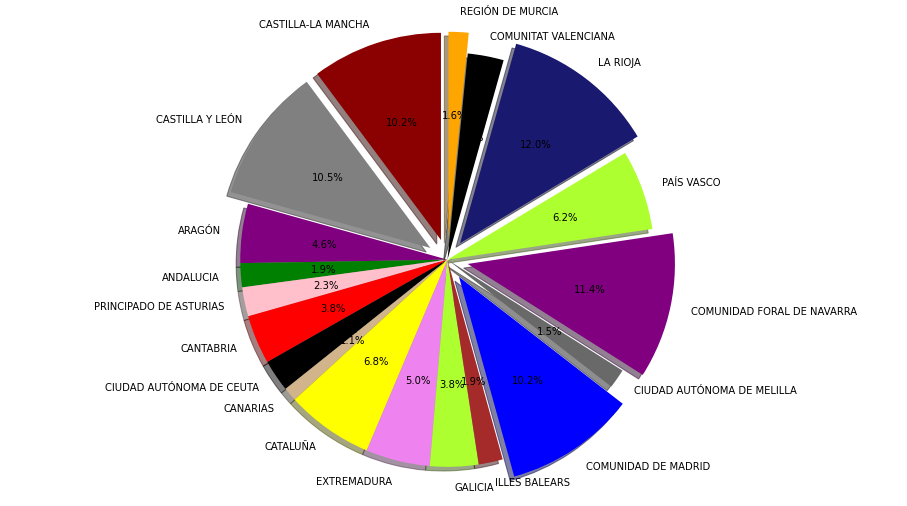

In [44]:
#Análisis de las comunidades más afectadas por pandemia en función del peso del valor medio
labels = L_nom_Com
sizes = L_mean_IA
colors=L_color_com
explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0, 0.1, 0,0.1)
fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.pie(sizes, explode=explode, labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

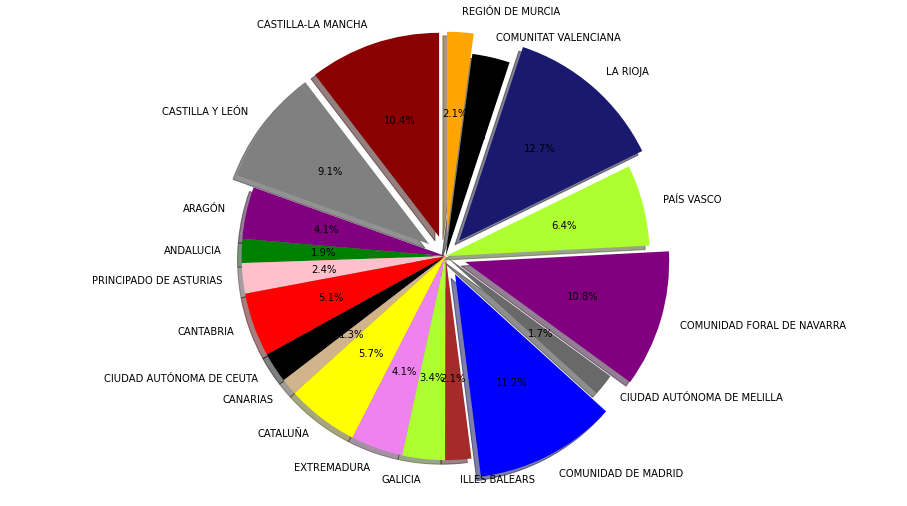

In [45]:
#Análisis de las comunidades más afectadas por pandemia en función del peso del valor máximo
labels = L_nom_Com
sizes = L_max_IA
colors=L_color_com
explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0, 0.1, 0,0.1)
fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.pie(sizes, explode=explode, labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Efecto de la densidad de población en la incidencia acumulada

In [46]:
#L_mean_IA,L_max_IA,L_nom_Com,L_den_pob,L_edadM_pob,L_edadMediana_pob,L_mayores65_pob,L_indice_enve_pob,L_color_com

* Lo primero que se quiere es analizar el efecto de la densidad de la población en el valor medio de la incidencia acumulada
* Debido a que la el valor de la densidad de población es mucho mayor al valor de la IAmedia, se procede a estandarizar el valor para cada comunidad en función del porcentaje.

In [47]:
display(Math(r"Porcentaje_{Densidad}={\frac{Densidad_p}{Densidad_{media}}} \cdot 100"))

<IPython.core.display.Math object>

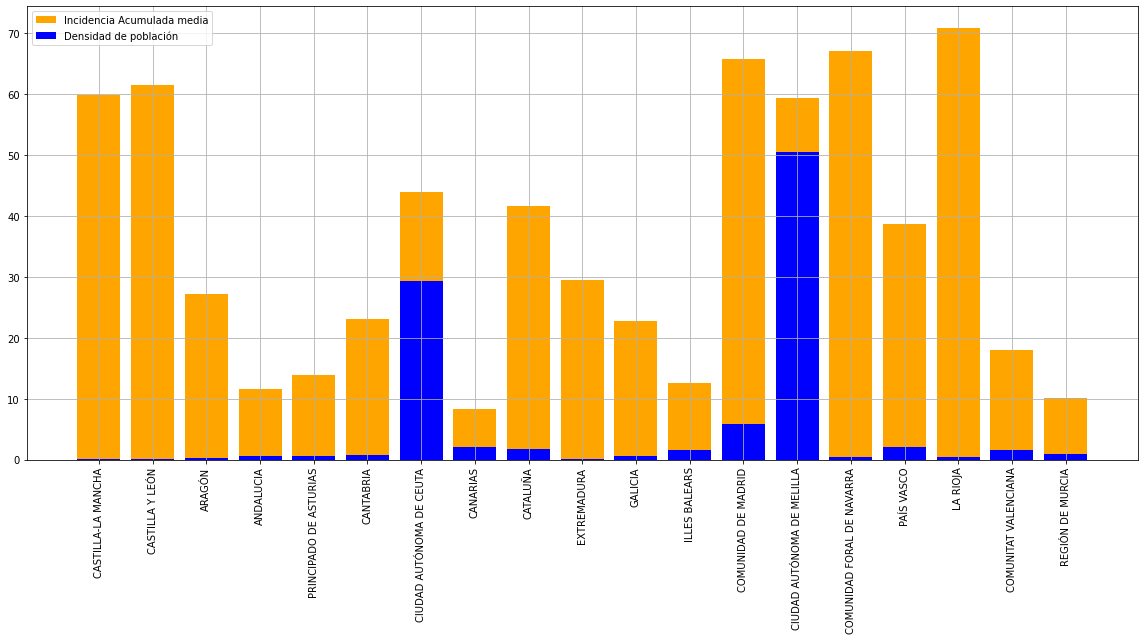

In [48]:
#L_mean_IA
#L_den_pob
Por_dens=[]
m=sum(L_den_pob)
for i in L_den_pob:
    Por_dens.append((i/m)*100)
    
x=L_nom_Com
y1=Por_dens
y2=L_mean_IA
ind = np.arange(len(y1))
fig,ax=plt.subplots(figsize=(16,9))
ax.bar(x,y2,0.8,bottom=y1,color='orange',label="Incidencia Acumulada media")
ax.bar(x,y1,0.8,color='blue',label="Densidad de población")
plt.xticks(rotation=90)
ax.legend()
ax.grid(True)
fig.tight_layout()
plt.show()



* Otra forma de representar el valor es mediante un gráfico bidimencional como el siguiente
* Donde el eje X es la densidad de población sin transformar y el eje y la incidencia acumulada media

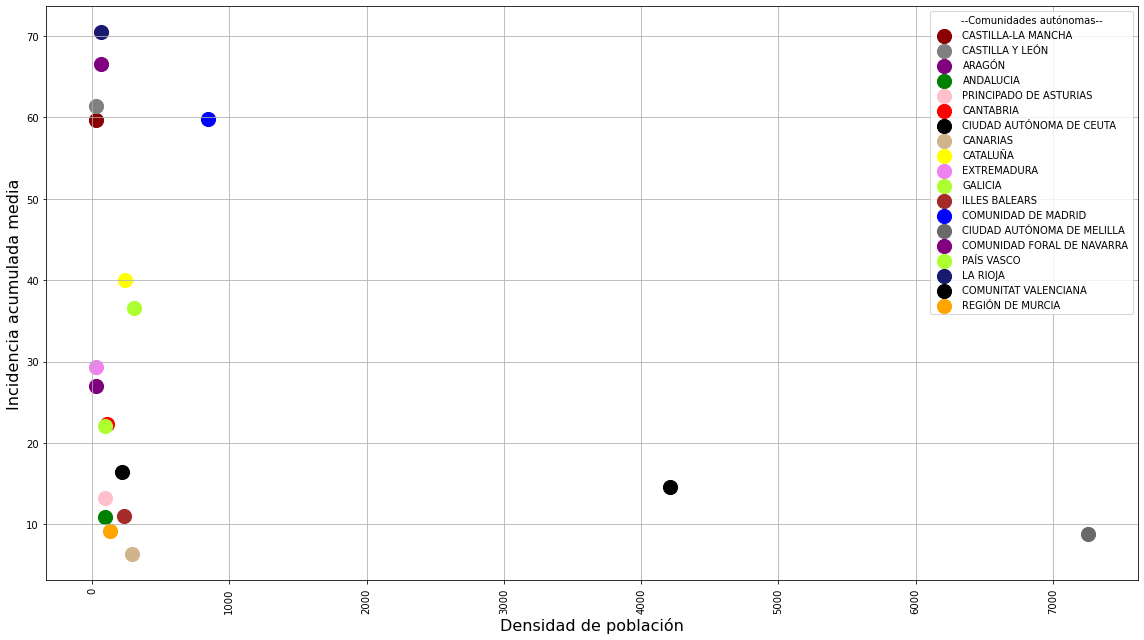

In [49]:
#L_mean_IA
#L_den_pob
x=L_den_pob
y2=L_mean_IA
label=L_nom_Com
size=np.ones(19)*200
j=0
fig,ax=plt.subplots(figsize=(16,9))
for i in ['CM','CL','AR','AN','AS','CB','CE','CN','CT','EX', 'GA','IB','MD','ML','NC','PV','RI','VC','MC']:
    scatter=ax.scatter(x[j],y2[j],color=Dic_color[i],label=label[j],s=size[j])  
    ax.set_ylabel('Incidencia acumulada media', fontsize=16)
    ax.set_xlabel('Densidad de población', fontsize=16)
    plt.xticks(rotation=90)
    j=j+1
    ax.grid(True)
ax.legend(title="--Comunidades autónomas--")
fig.tight_layout()
plt.show()

In [50]:
def bar_comparacion(y1,y2,l1="Incidencia Acumulada media",l2=''):   
    x=L_nom_Com
    y1=y1
    y2=y2
    fig,ax=plt.subplots(figsize=(16,9))
    ax.bar(x,y1,0.8,color='orange',bottom=y2,label=l1)
    ax.bar(x,y2,0.8,color='blue',label=l2)
    ax.grid(True)
    ax.legend()
    plt.xticks(rotation=90)
    plt.show()

In [51]:
def graf_bidimencional(x,y2,tx="",ty="Incidencia Acumulada media",tamaño_scatter_p=200):
    #L_mean_IA
    #L_den_pob
    x=x
    y2=y2
    label=L_nom_Com
    size=np.ones(19)*tamaño_scatter_p
    j=0
    fig,ax=plt.subplots(figsize=(16,9))
    for i in ['CM','CL','AR','AN','AS','CB','CE','CN','CT','EX', 'GA','IB','MD','ML','NC','PV','RI','VC','MC']:
        scatter=ax.scatter(x[j],y2[j],color=Dic_color[i],label=label[j],s=size[j])  
        ax.set_ylabel(ty, fontsize=16)
        ax.set_xlabel(tx, fontsize=16)
        plt.xticks(rotation=90)
        j=j+1
        ax.grid(True)
    ax.legend(title="--Comunidades autónomas--")
    fig.tight_layout()
    plt.show()

#### Efecto de la edad media de población en la incidencia acumulada media

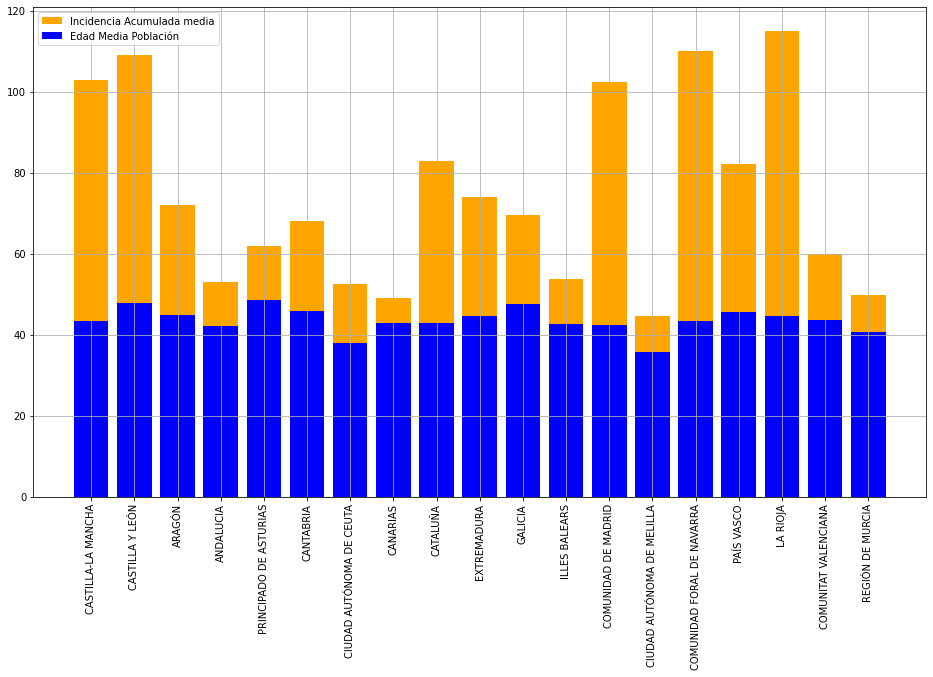

In [52]:
#L_mean_IA,L_max_IA,L_nom_Com,L_den_pob,L_edadM_pob,L_edadMediana_pob,L_mayores65_pob,L_indice_enve_pob,L_color_com
bar_comparacion(L_mean_IA,L_edadM_pob,"Incidencia Acumulada media","Edad Media Población")

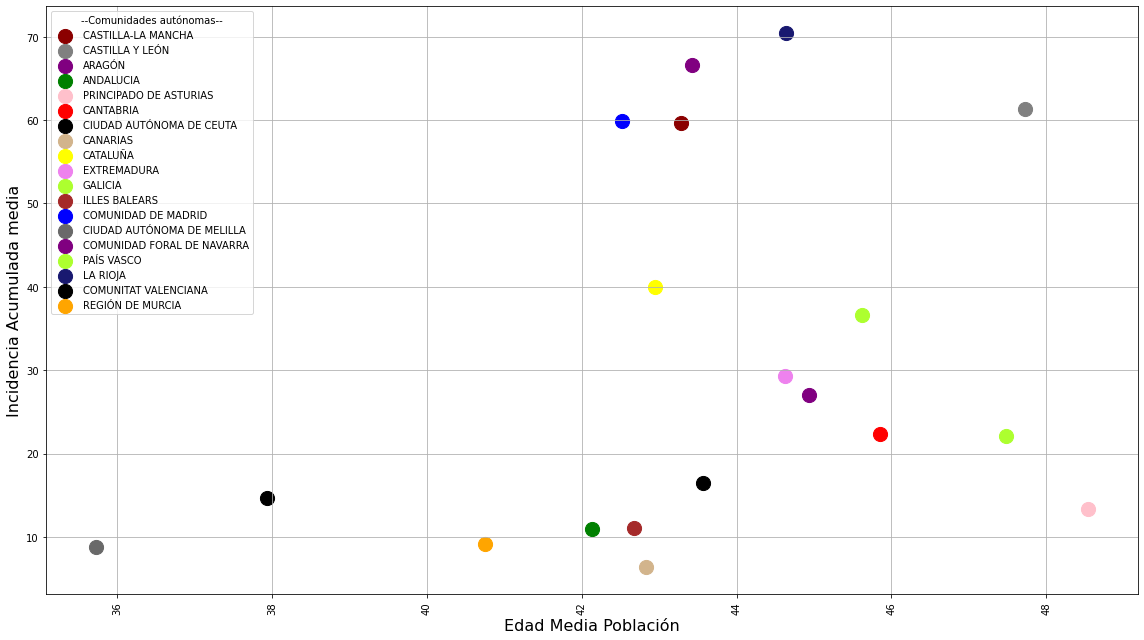

In [53]:
graf_bidimencional(L_edadM_pob,L_mean_IA,tx="Edad Media Población",ty="Incidencia Acumulada media",tamaño_scatter_p=200)

#### Efecto de la edad mediana de la población en la incidencia acumulada media

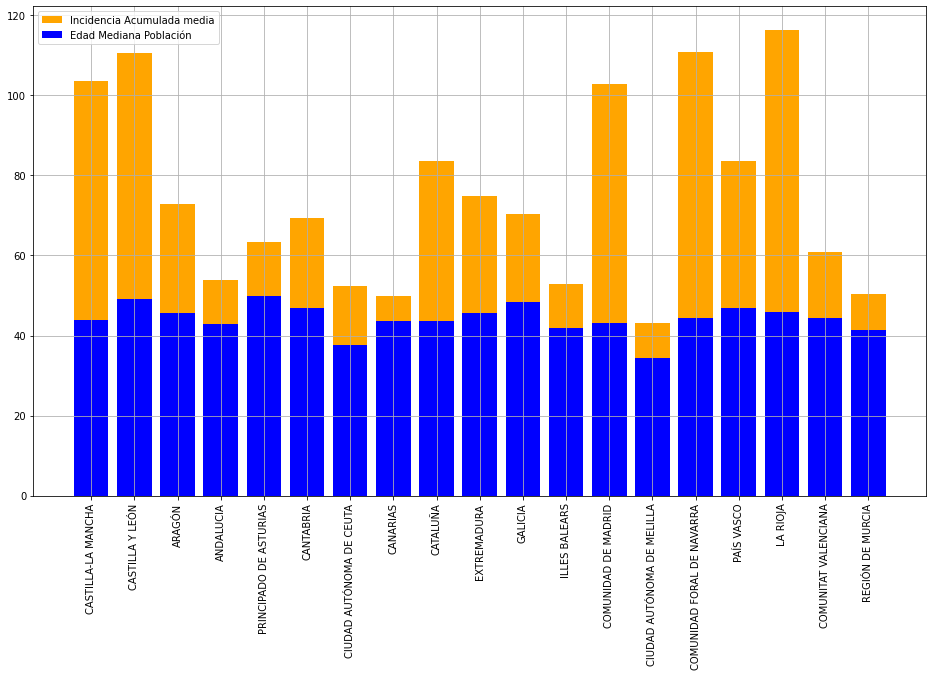

In [54]:
bar_comparacion(L_mean_IA,L_edadMediana_pob,"Incidencia Acumulada media","Edad Mediana Población")

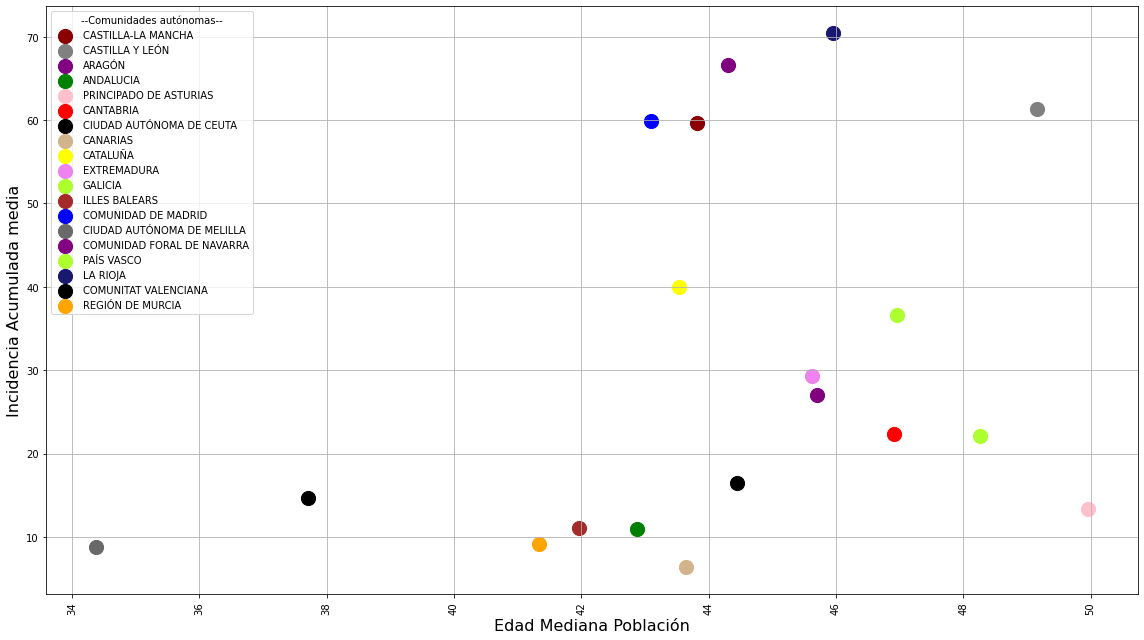

In [55]:
graf_bidimencional(L_edadMediana_pob,L_mean_IA,tx="Edad Mediana Población",ty="Incidencia Acumulada media")

#### Efecto del porcentaje de población con 65 años o más respecto a la incidencia acumulada media

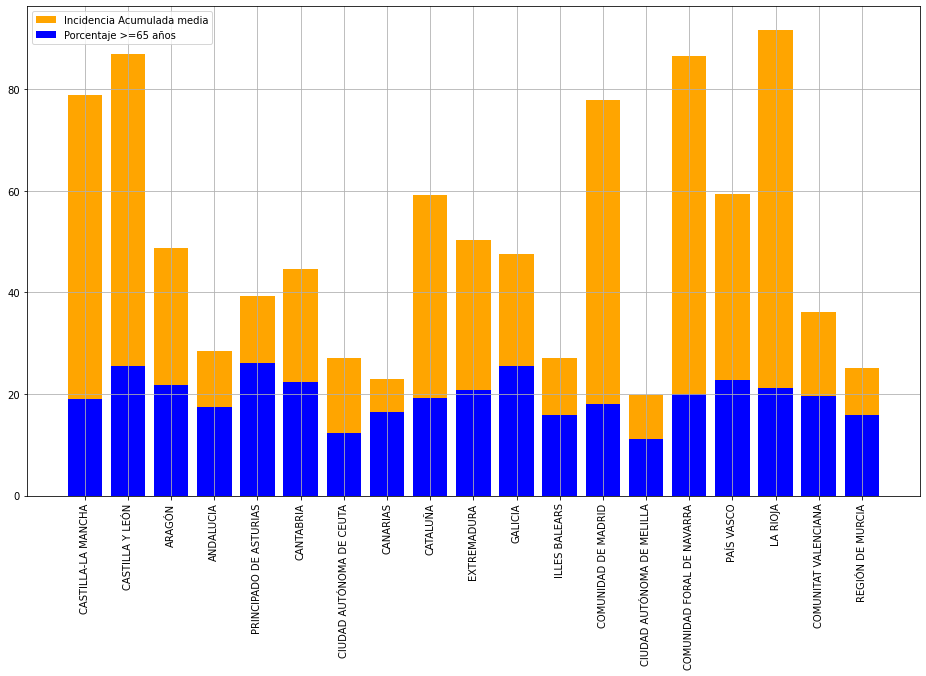

In [56]:
bar_comparacion(L_mean_IA,L_mayores65_pob,"Incidencia Acumulada media","Porcentaje >=65 años")

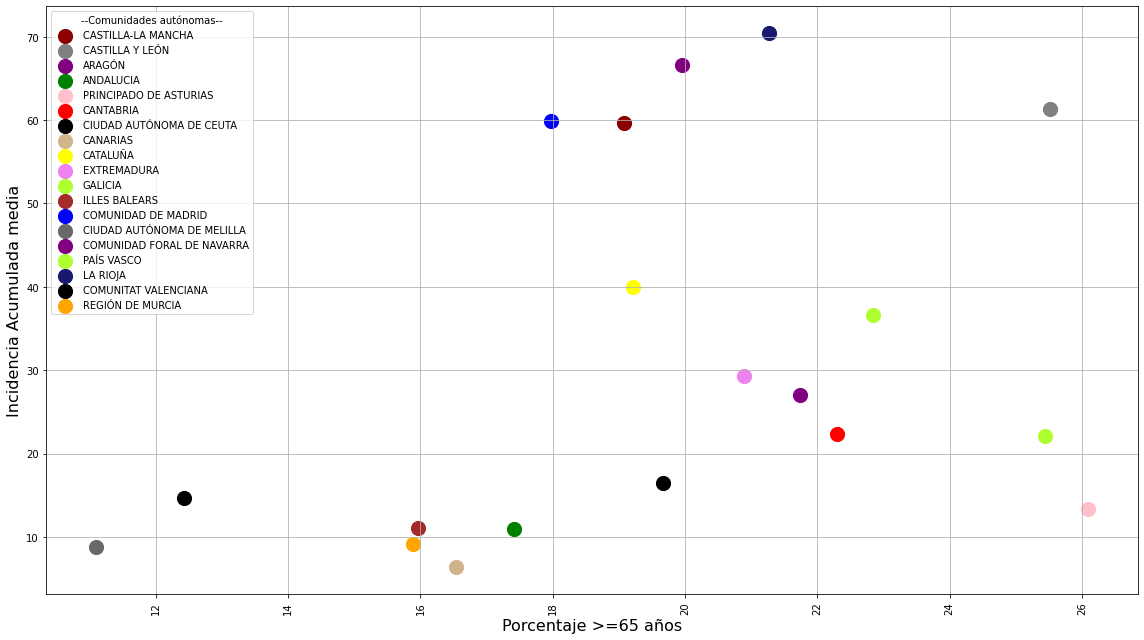

In [57]:
graf_bidimencional(L_mayores65_pob,L_mean_IA,tx="Porcentaje >=65 años",ty="Incidencia Acumulada media")

#### Efecto del índice de envejecimiento de población en la incidencia acumulada media

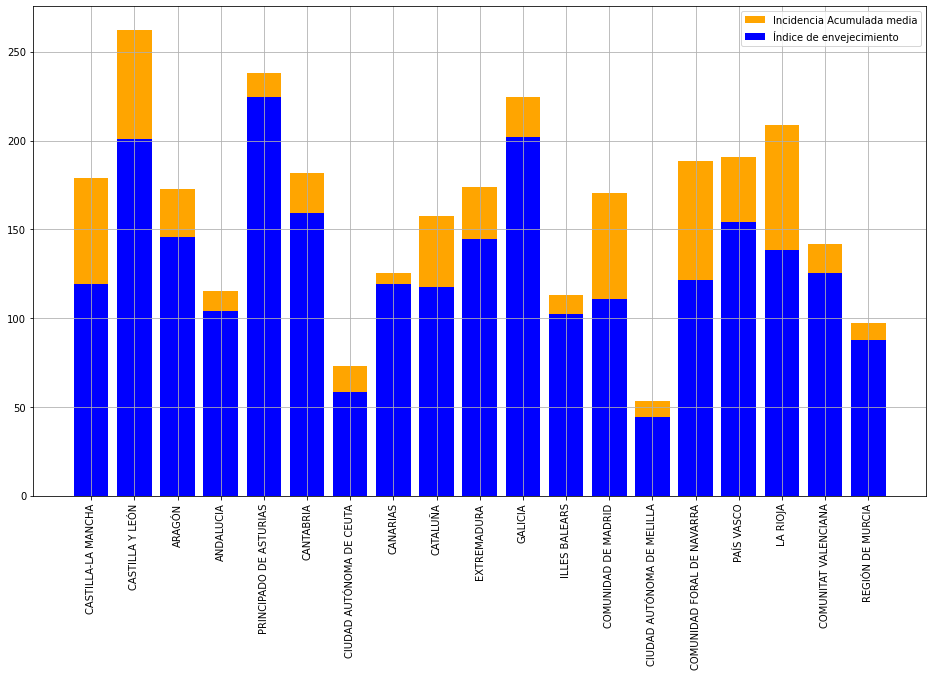

In [58]:
bar_comparacion(L_mean_IA,L_indice_enve_pob,"Incidencia Acumulada media","Índice de envejecimiento")

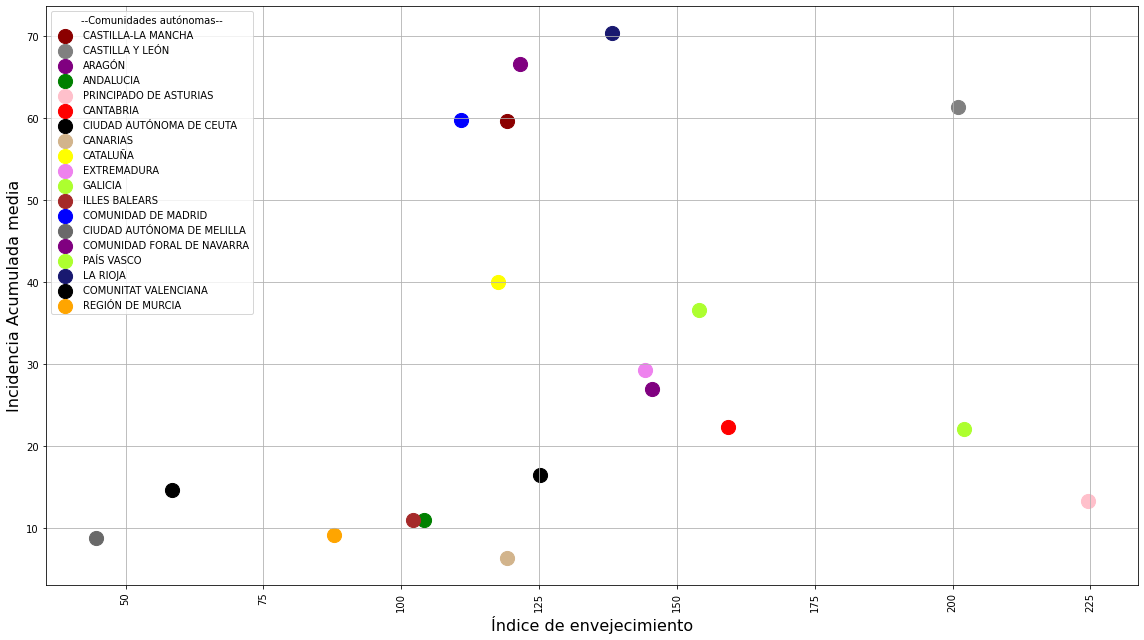

In [59]:
graf_bidimencional(L_indice_enve_pob,L_mean_IA,tx="Índice de envejecimiento",ty="Incidencia Acumulada media")

#### Efecto de la densidad de población,índice de envejecimiento, en la incidencia acumulada máxima registrada

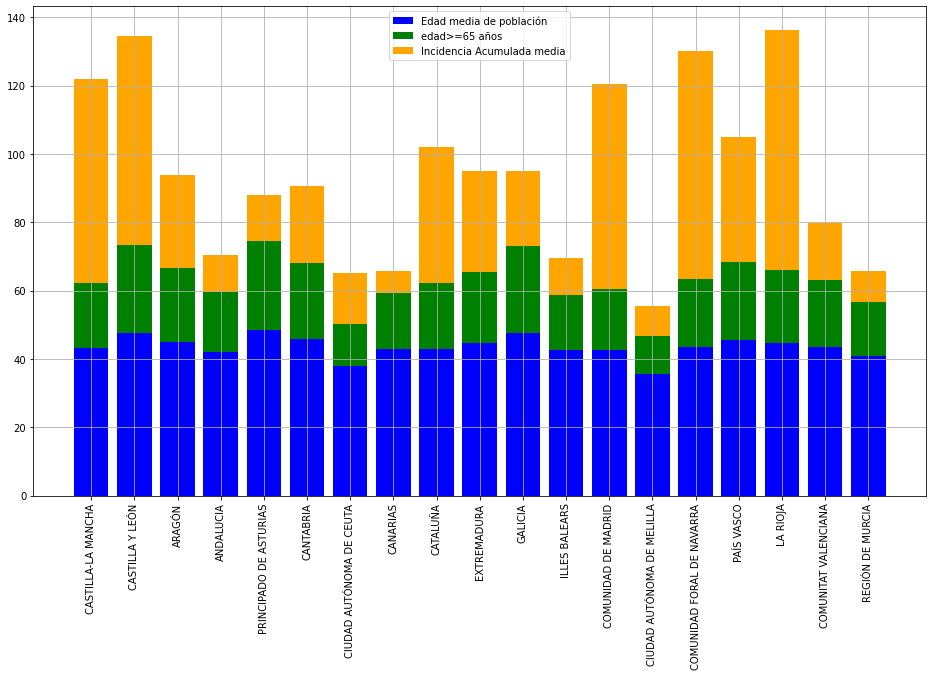

In [60]:
x=L_nom_Com
y1=L_edadM_pob
y2=L_mayores65_pob
y3=L_mean_IA
bottom_i=list(np.add(y1,y2))
fig,ax=plt.subplots(figsize=(16,9))
ax.bar(x,y1,0.8,color='blue',label="Edad media de población")
ax.bar(x,y2,0.8,bottom=y1,color='green',label="edad>=65 años")
ax.bar(x,y3,0.8,bottom=bottom_i,color='orange',label="Incidencia Acumulada media")
ax.grid(True)
ax.legend()
plt.xticks(rotation=90)
plt.show()